In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

C:\Users\nonam\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\nonam\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\nonam\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\nonam\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Load Data

In [2]:
# load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# set index
train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)

In [4]:
print('length of train set : ', len(train_df))
print('length of test set : ', len(test_df))

length of train set :  250
length of test set :  19750


In [5]:
train_df.head()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


# Variables Corrleation >= 0.15

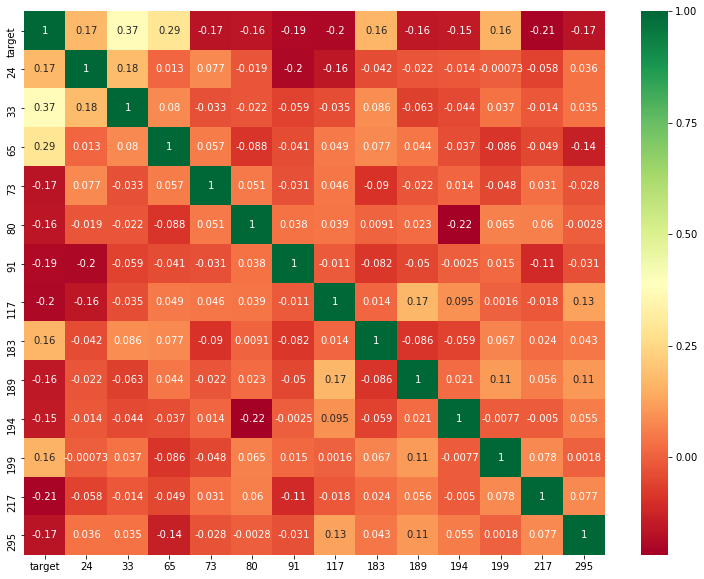

In [6]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["target"])>=0.15]
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Only 13 columns showed a correlation of more than 0.15

# 2D/3D plot by PCA

In [7]:
X_train = train_df.drop(['target'], axis=1)
y_train = train_df['target']

### 1. Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
train_df_scale = scaler.fit_transform(X_train)
train_df_scale

array([[0.45456406, 0.95252336, 0.53808144, ..., 0.43724546, 0.63032191,
        0.38829533],
       [0.69586574, 0.36598131, 0.35678991, ..., 0.31044058, 0.33748702,
        0.71328337],
       [0.36758084, 0.53121495, 0.36275345, ..., 0.51462421, 0.59501558,
        0.36501355],
       ...,
       [0.76340565, 0.27401869, 0.44232408, ..., 0.65457238, 0.50126094,
        0.44346994],
       [0.60151453, 0.74224299, 0.45339922, ..., 0.36486486, 0.77733274,
        0.49067134],
       [0.57470323, 0.62317757, 0.44573181, ..., 0.24472418, 0.38362261,
        0.79317493]])

### 2. Demension Reduction by PCA

In [9]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
train_df_pca_2 = pca_2.fit_transform(train_df_scale)
pca_3 = PCA(n_components=3)
train_df_pca_3 = pca_3.fit_transform(train_df_scale)

C:\Users\nonam\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


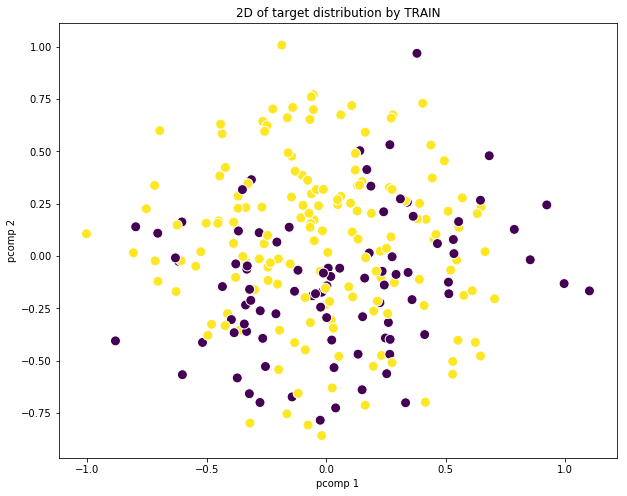

In [10]:
# plot 2d
plt.figure(figsize=(10, 8))
plt.scatter(train_df_pca_2[:,0], train_df_pca_2[:,1], c=train_df['target'], s=100, edgecolors='white')
plt.title("2D of target distribution by TRAIN")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

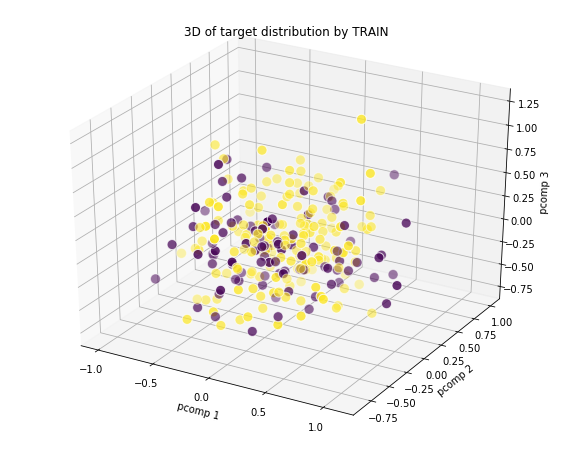

In [11]:
# plot 3d 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_df_pca_3[:,0], train_df_pca_3[:,1], train_df_pca_3[:,2], c=train_df['target'], s=100, edgecolors='white')
ax.set_title('3D of target distribution by TRAIN')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
plt.show()

In [18]:
# split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

# Training model

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01)
lr.fit(X_train, y_train)

C:\Users\nonam\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=4)
forest.fit(X_train, y_train)

C:\Users\nonam\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\nonam\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
print('Score of LogisticRegression :', lr.score(X_val, y_val))
print('Score of RandomForest : ', forest.score(X_val, y_val))

Score of LogisticRegression : 0.7142857142857143
Score of RandomForest :  0.6285714285714286


# Preprocessing test.csv

In [26]:
# scale
test_df_scale = scaler.fit_transform(test_df)

# pca to 3d
# test_df_pca = pca_3.fit_transform(test_df_scale)

In [28]:
test_df_scale

array([[0.5831313 , 0.34949522, 0.32779419, ..., 0.48520408, 0.53002042,
        0.62327849],
       [0.61834886, 0.60812965, 0.46331856, ..., 0.53431122, 0.40245065,
        0.41121268],
       [0.74263111, 0.5543305 , 0.5171098 , ..., 0.51568878, 0.30687543,
        0.80414381],
       ...,
       [0.44864106, 0.36238045, 0.34847366, ..., 0.69566327, 0.59087815,
        0.56721511],
       [0.42414189, 0.64678533, 0.6164451 , ..., 0.66670918, 0.46289993,
        0.58793419],
       [0.61324486, 0.45802338, 0.51058592, ..., 0.46428571, 0.5056501 ,
        0.60463132]])

# Predict test data

In [33]:
test_pred = lr.predict(test_df_scale)

In [34]:
submit_df = pd.DataFrame()
submit_df['id'] = test_df.index
submit_df['target'] = test_pred

In [35]:
submit_df.to_csv('submission.csv', index=False)